# Tangadpalliwar, Abhilash - Homework 1
# UIN: 825009793

## Question 1: Inverse Method for exponentials

1. Use the inverse method and the language $Unif[0,1]$ generator (runif in R, numpy.random.uniform in python), to generate random deviates from an exponential distribution with mean $\mu$. $\mu$ and the number of random deviates should be arguments to your function. This is Example 22.3.1 in Lange. Be aware that there are two standard methods for parameterizing the exponential.
2. For some particular $\mu$ of your choosing, make a histogram of the random deviates and plot the appropriate exponential density curve on top of the histogram to confirm that the generator is working. Verify that the mean and standard deviation are what they should be.
3. Compare the speed of your exponential generator to the language generator (rexp in R, numpy.random.exponential in python). Try to make your generator computationally competitive with the built in generator, by avoiding for loops and other slow code.

Solution:
Part 1 - Generating random deviates (n=1000) from an exponential distribution with mean μ = 15

In [182]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plot1
plot1.style.use('seaborn-white')
n = 1000
mu = 15
U = np.random.uniform(size=n)
X = -mu*np.log(1-U)
X

array([  3.54877948e+00,   3.31659800e+01,   1.58355054e+01,
         4.94835366e-01,   2.19983403e+01,   3.89377093e-01,
         5.65913259e+00,   1.60280078e+01,   2.71816013e+01,
         2.40730426e+01,   2.43037819e+01,   1.05559424e+01,
         1.11102056e+00,   7.28655683e+00,   2.89793498e+00,
         4.54949487e+00,   2.87625095e+01,   2.51431403e+00,
         2.48745804e+01,   3.99022593e+00,   3.68184402e-01,
         1.19448551e+01,   3.27401709e+01,   5.78171704e-01,
         1.06579755e+01,   4.81661650e+00,   3.22372252e+01,
         1.56209165e+01,   5.16808669e-01,   1.10573894e+01,
         1.62521031e+01,   1.37292722e+01,   3.89894938e+00,
         7.11397564e+01,   1.74426379e+01,   1.98043556e+01,
         3.32069445e+01,   1.55716567e+00,   2.12226791e+01,
         3.20849150e+00,   1.72258004e+01,   1.86294983e+01,
         6.23192901e+00,   5.13320052e+01,   1.37176091e+01,
         1.58149466e+00,   1.14811104e+00,   3.23959995e+01,
         1.74939427e+00,

Part 2 -  Plotting the histogram as well as appropriate exponential density curve on top of the histogram

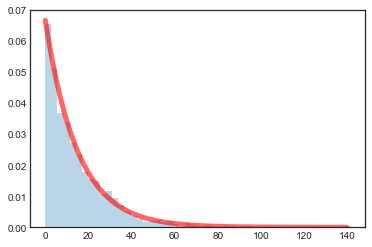

In [187]:
from scipy.stats import expon
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=50)
x = np.linspace(0.001,140, 100)
plot.plot(x, expon.pdf(x,scale =15),'r-', lw=5, alpha=0.6, label='exponential pdf')
plot.ylim(0,0.07)
plot.hist(X, **kwargs);

Verifying mean and standard deviation of the generated exponential distribution X

In [183]:
np.mean(X)

14.982756388950779

In [184]:
np.std(X)

15.216685799224276

Thus, we can see that the mean and the standard deviation of the generated exponential distribution X are very close to 15 which we had initially taken as μ to generate these deviates.

Part 3 - Comparing the speed of our exponential generator to the random generator

In [188]:
# obtaining speed of our exponential generator
import time
start_time1 = time.clock()
n = 1000
mu = 15
U = np.random.uniform(size=n)
X = -mu*np.log(1-U)
elapsed_time1 = (time.clock() - start_time1)
elapsed_time1

0.0003077284395658353

In [189]:
# obtaining speed of language generator (random generator)
start_time2 = time.clock()
np.random.exponential(scale=15, size=1000)
elapsed_time2 = (time.clock() - start_time2)
elapsed_time2

0.0002473154941071698

Thus we can see that our generator takes almost similar time as the language generator, albeit a bit more than language generator. Thus, they are comparable.

## Question 2: Simulation Study of the LLN and CLT

1. Create a $n \times p$ matrix $X$ with $n=100$ and $p=1000$ and each entry $1$ with probability $0.5$ and $0$ with probability $0.5$. If you would like some intuition for this simulation consider this: Suppose 1/2 of all voters support proposition A. We conduct 100 surveys (number of rows of X) each with 1000 voters (number of columns = sample size of poll). A voter responds 1 if they support A, 0 if they do not support A. Note on Confusing Notation: The sample size of each poll is $p$. Usually $n$ is sample size.
2. Compute the running mean of each row of $X$ to produce a new matrix $Y$ which is again $100 \times 1000$. Specifically the row $i$, column $j$ entry of $Y$ is
$$Y_{ij} = \frac{1}{j} \sum_{k=1}^j X_{ik}$$
Try to avoid using nested for loops.
3. Plot each row of $Y$ (on the y--axis) against the column number (on the x--axis). This will result in 1 plot with 100 lines. Then make three histograms 1) first column of $Y$, 2) 10th column of $Y$, and 3) the last column of $Y$. Your images should roughly look like what is below. (If you want to make the results clearer and prettier, draw all histograms or density estimators on top of each other with different colors, see lecture notes from the first class [here](https://longjp.github.io/statcomp/lectures/00intro.ipynb) for how to do this with ggplot in R or [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html) for code in python from VanderPlas) What is this simulation showing?

Solution
Part 1 - Creating the n x p matrix X

In [141]:
X = np.random.choice(a=[0.0,1.0], size=(100, 1000), p=[0.5, 0.5])
X

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  1.,  1., ...,  0.,  1.,  1.],
       [ 0.,  1.,  0., ...,  1.,  1.,  0.],
       [ 1.,  0.,  1., ...,  1.,  0.,  1.]])

Part 2 - Creating a Y matrix with all the initial elements to be 0

In [142]:
Y = np.random.choice(a=[0.0,1.0], size=(100, 1000), p=[1, 0])
Y

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

Computing the elements of Y matrix as per the given rule

In [143]:
for i in range(0,100):
    for j in range(0,1000):
        Y[i,j] = np.sum(X[i,0:j+1])/(j+1)
Y

array([[ 0.        ,  0.5       ,  0.66666667, ...,  0.49298597,
         0.49249249,  0.492     ],
       [ 0.        ,  0.5       ,  0.66666667, ...,  0.49699399,
         0.4974975 ,  0.497     ],
       [ 0.        ,  0.        ,  0.        , ...,  0.51202405,
         0.51151151,  0.511     ],
       ..., 
       [ 0.        ,  0.5       ,  0.66666667, ...,  0.50701403,
         0.50750751,  0.508     ],
       [ 0.        ,  0.5       ,  0.33333333, ...,  0.48396794,
         0.48448448,  0.484     ],
       [ 1.        ,  0.5       ,  0.66666667, ...,  0.50501002,
         0.5045045 ,  0.505     ]])

Part 3 - Plotting each row of Y against its column number

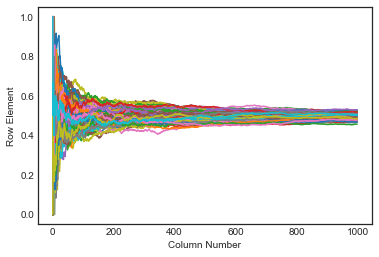

In [144]:
import matplotlib.pyplot as plot2

plot2.xlabel("Column Number")
plot2.ylabel("Row Element")
T = range(Y.shape[1])
for i in range(Y.shape[0]):
    plot2.plot(T, Y[i,:])
plot2.show()

Plotting histograms of 1st, 10th and 1000th column of Y respectively

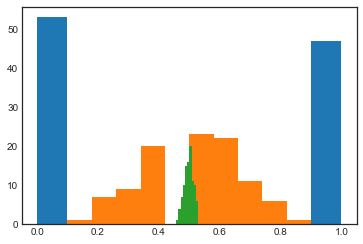

In [145]:
plot2.hist(Y[:,0]);
plot2.hist(Y[:,9]);
plot2.hist(Y[:,999]);

According to the above graph, we can say that in case of the 1st column of Y (blue bars), the plot is clearly two discrete values 0 and 1 because the first column has the averages either 0 or 1.

The plot of the 10th column of Y (orange bars) somewhat represents a normal curve, while the plot of the last column of Y, i.e. 1000th column (green bars) looks very similar to a bell-shaped normal curve, although in this graph it is concentrated at the center because of scale.

This is consistent with the law of large numbers and Central Limit Theorem (CLT), which says that the distribution of a large set of random numbers tends to approximate a normal distribution and since the last column has the most randomness, its distribution is closer to a normal distribution.